
# Case Study 📓: Customer Segmentation and Targeting

In [1]:
#Import modules and data 
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight") # styling the charts

import warnings
warnings.filterwarnings('ignore')

Load the Data

In [2]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/household_data.csv'

df = pd.read_csv(url)

In [3]:
df.shape

(15000, 11)

In [4]:
#Numerical inspection and summaries 
df.head()

,householdID,total_ppl,own_rent,square_foot,household_income,number_pets,county,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
0,1,3,own,3309,80464,1,York,2535,2842,1,No
1,2,3,own,3814,47696,2,York,2913,3938,1,No
2,3,3,rent,2592,108256,2,Cumberland,1986,3687,2,No
3,4,2,own,2628,68064,1,Cumberland,2505,2826,1,No
4,5,3,rent,2442,62786,2,Sagadahoc,3541,1344,2,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   householdID              15000 non-null  int64 
 1   total_ppl                15000 non-null  int64 
 2   own_rent                 15000 non-null  object
 3   square_foot              15000 non-null  int64 
 4   household_income         15000 non-null  int64 
 5   number_pets              15000 non-null  int64 
 6   county                   15000 non-null  object
 7   entertainment_spend_est  15000 non-null  int64 
 8   travel_spend_est         15000 non-null  int64 
 9   under_12                 15000 non-null  int64 
 10  LL_passholder            15000 non-null  object
dtypes: int64(8), object(3)
memory usage: 1.3+ MB


In [6]:
df.isna().sum()

householdID                0
total_ppl                  0
own_rent                   0
square_foot                0
household_income           0
number_pets                0
county                     0
entertainment_spend_est    0
travel_spend_est           0
under_12                   0
LL_passholder              0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.drop(columns = 'householdID').copy()

EDA

# Univariate Analysis

In [9]:
df.describe()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.130067,3118.928600,72555.562067,1.509200,2651.515000,3556.169400,1.766533
std,0.891592,815.925967,18758.466766,0.790163,766.499083,599.815642,0.732072
min,1.000000,370.000000,6801.000000,0.000000,193.000000,924.000000,0.000000
25%,3.000000,2506.000000,60007.000000,1.000000,2140.000000,3173.750000,1.000000
50%,3.000000,3042.000000,72512.000000,2.000000,2650.000000,3573.000000,2.000000
75%,4.000000,3738.000000,85201.750000,2.000000,3158.250000,3961.000000,2.000000
max,7.000000,6081.000000,145381.000000,4.000000,5541.000000,5908.000000,4.000000


In [10]:
df.describe(include = 'object')

,own_rent,county,LL_passholder
count,15000,15000,15000
unique,2,3,2
top,own,Cumberland,No
freq,11306,8120,8837


In [11]:
object_cols = df.select_dtypes('object').columns.to_list()
object_cols

['own_rent', 'county', 'LL_passholder']

own_rent


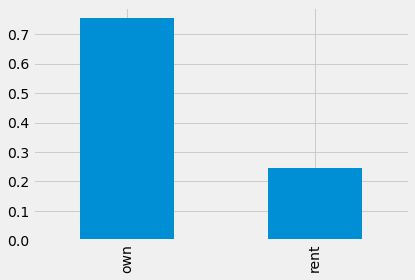

county


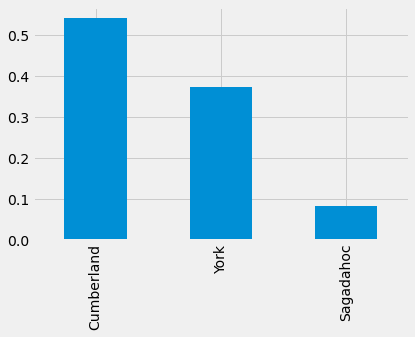

LL_passholder


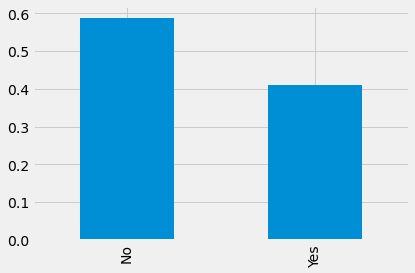

In [12]:
for col in object_cols:
    print(col)
    df[col].value_counts(normalize = True).round(3).plot(kind = 'bar')
    plt.show()

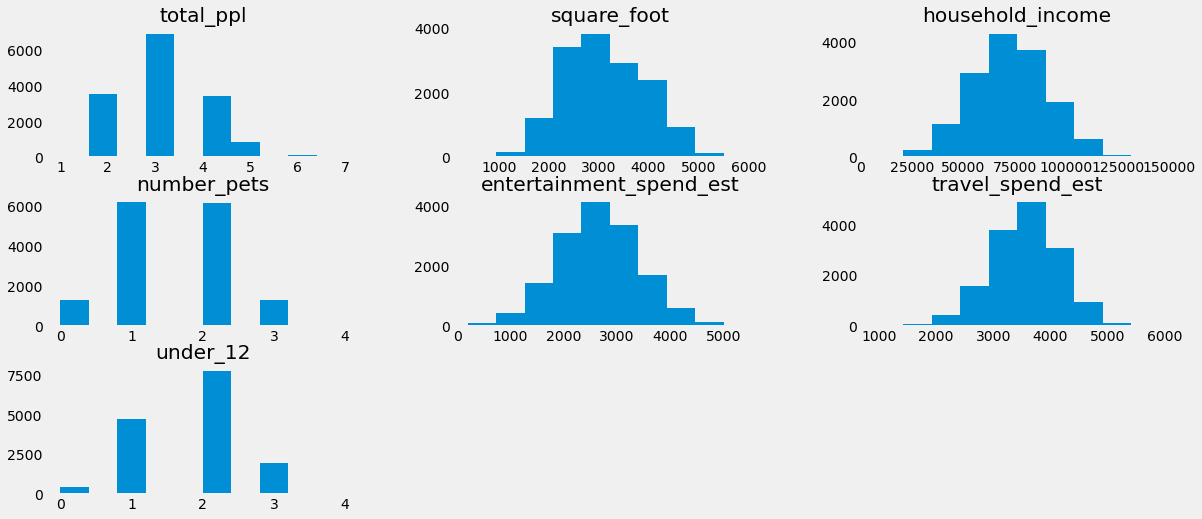

In [13]:
# for numeric columns we used histogram
df.hist(figsize=(18,8), grid = False);

In [14]:
### Bivariate Analysis
df.groupby('county').describe().T

county                            Cumberland      Sagadahoc           York
total_ppl               count    8120.000000    1265.000000    5615.000000
                        mean        3.126724       3.098024       3.142119
                        std         0.889276       0.879552       0.897547
                        min         1.000000       1.000000       1.000000
                        25%         3.000000       3.000000       3.000000
                        50%         3.000000       3.000000       3.000000
                        75%         4.000000       4.000000       4.000000
                        max         7.000000       6.000000       7.000000
square_foot             count    8120.000000    1265.000000    5615.000000
                        mean     2683.856404    2366.762055    3917.553161
                        std       524.159125     547.527828     524.063740
                        min       370.000000     614.000000    1950.000000
                        25%      2333.000000    1986.000000    3566.500000
                        50%      2679.000000    2392.000000    3914.000000
                        75%      3037.250000    2741.000000    4279.000000
                        max      5140.000000    4050.000000    6081.000000
household_income        count    8120.000000    1265.000000    5615.000000
                        mean    72758.319212   66373.092490   73655.194479
                        std     18595.310178   19212.421082   18629.460212
                        min      7181.000000    6801.000000   11770.000000
                        25%     60282.750000   53176.000000   61051.000000
                        50%     72616.000000   66116.000000   73634.000000
                        75%     85324.000000   78665.000000   86231.000000
                        max    137489.000000  120402.000000  145381.000000
number_pets             count    8120.000000    1265.000000    5615.000000
                        mean        1.515887       1.458498       1.510953
                        std         0.791315       0.786592       0.789027
                        min         0.000000       0.000000       0.000000
                        25%         1.000000       1.000000       1.000000
                        50%         2.000000       1.000000       2.000000
                        75%         2.000000       2.000000       2.000000
                        max         4.000000       4.000000       4.000000
entertainment_spend_est count    8120.000000    1265.000000    5615.000000
                        mean     2626.450739    2601.719368    2698.979519
                        std       762.493221     762.602445     770.849493
                        min       193.000000     276.000000     203.000000
                        25%      2120.000000    2088.000000    2188.500000
                        50%      2616.000000    2606.000000    2695.000000
                        75%      3134.000000    3076.000000    3211.500000
                        max      5541.000000    5026.000000    5385.000000
travel_spend_est        count    8120.000000    1265.000000    5615.000000
                        mean     3480.488300    2717.532806    3854.549777
                        std       511.305216     538.424416     511.918423
                        min      1552.000000     924.000000    2018.000000
                        25%      3140.000000    2375.000000    3502.500000
                        50%      3472.500000    2713.000000    3849.000000
                        75%      3825.000000    3058.000000    4209.000000
                        max      5356.000000    4626.000000    5908.000000
under_12                count    8120.000000    1265.000000    5615.000000
                        mean        1.762808       1.767589       1.771683
                        std         0.732068       0.725699       0.733602
                        min         0.000000       0.000000       0.000000
                        2

In [15]:
 df.groupby('own_rent').describe().T

own_rent                                 own           rent
total_ppl               count   11306.000000    3694.000000
                        mean        3.131877       3.124526
                        std         0.888592       0.900810
                        min         1.000000       1.000000
                        25%         3.000000       3.000000
                        50%         3.000000       3.000000
                        75%         4.000000       4.000000
                        max         7.000000       7.000000
square_foot             count   11306.000000    3694.000000
                        mean     3181.954537    2926.028966
                        std       813.078393     794.187726
                        min       370.000000     854.000000
                        25%      2556.000000    2372.000000
                        50%      3122.000000    2834.500000
                        75%      3807.000000    3441.500000
                        max      6081.000000    5623.000000
household_income        count   11306.000000    3694.000000
                        mean    72759.956129   71929.985652
                        std     18643.842213   19093.979189
                        min      6801.000000    9928.000000
                        25%     60332.000000   59231.000000
                        50%     72705.500000   72141.500000
                        75%     85409.500000   84632.250000
                        max    145381.000000  141958.000000
number_pets             count   11306.000000    3694.000000
                        mean        1.514506       1.492962
                        std         0.791156       0.786998
                        min         0.000000       0.000000
                        25%         1.000000       1.000000
                        50%         2.000000       1.000000
                        75%         2.000000       2.000000
                        max         4.000000       4.000000
entertainment_spend_est count   11306.000000    3694.000000
                        mean     2659.564479    2626.878452
                        std       768.324860     760.457899
                        min       211.000000     193.000000
                        25%      2149.000000    2123.000000
                        50%      2655.000000    2637.000000
                        75%      3169.000000    3121.000000
                        max      5541.000000    5226.000000
travel_spend_est        count   11306.000000    3694.000000
                        mean     3599.561649    3423.361397
                        std       576.964128     647.138582
                        min       924.000000    1290.000000
                        25%      3232.000000    2996.000000
                        50%      3604.500000    3448.000000
                        75%      3986.750000    3869.000000
                        max      5908.000000    5591.000000
under_12                count   11306.000000    3694.000000
                        mean        1.762781       1.778018
                        std         0.736595       0.718027
                        min         0.000000       0.000000
                        25%         1.000000       1.000000
                        50%         2.000000       2.000000
                        75%         2.000000       2.000000
                        max         4.000000       4.000000

# #Graphical Summaries

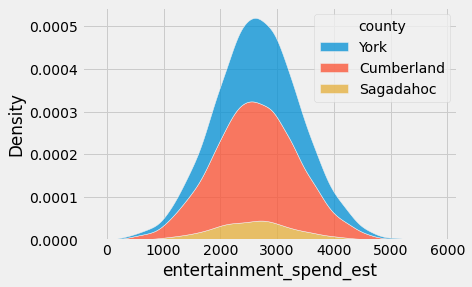

In [16]:
sns.kdeplot(data=df, x="entertainment_spend_est", hue="county", multiple="stack");

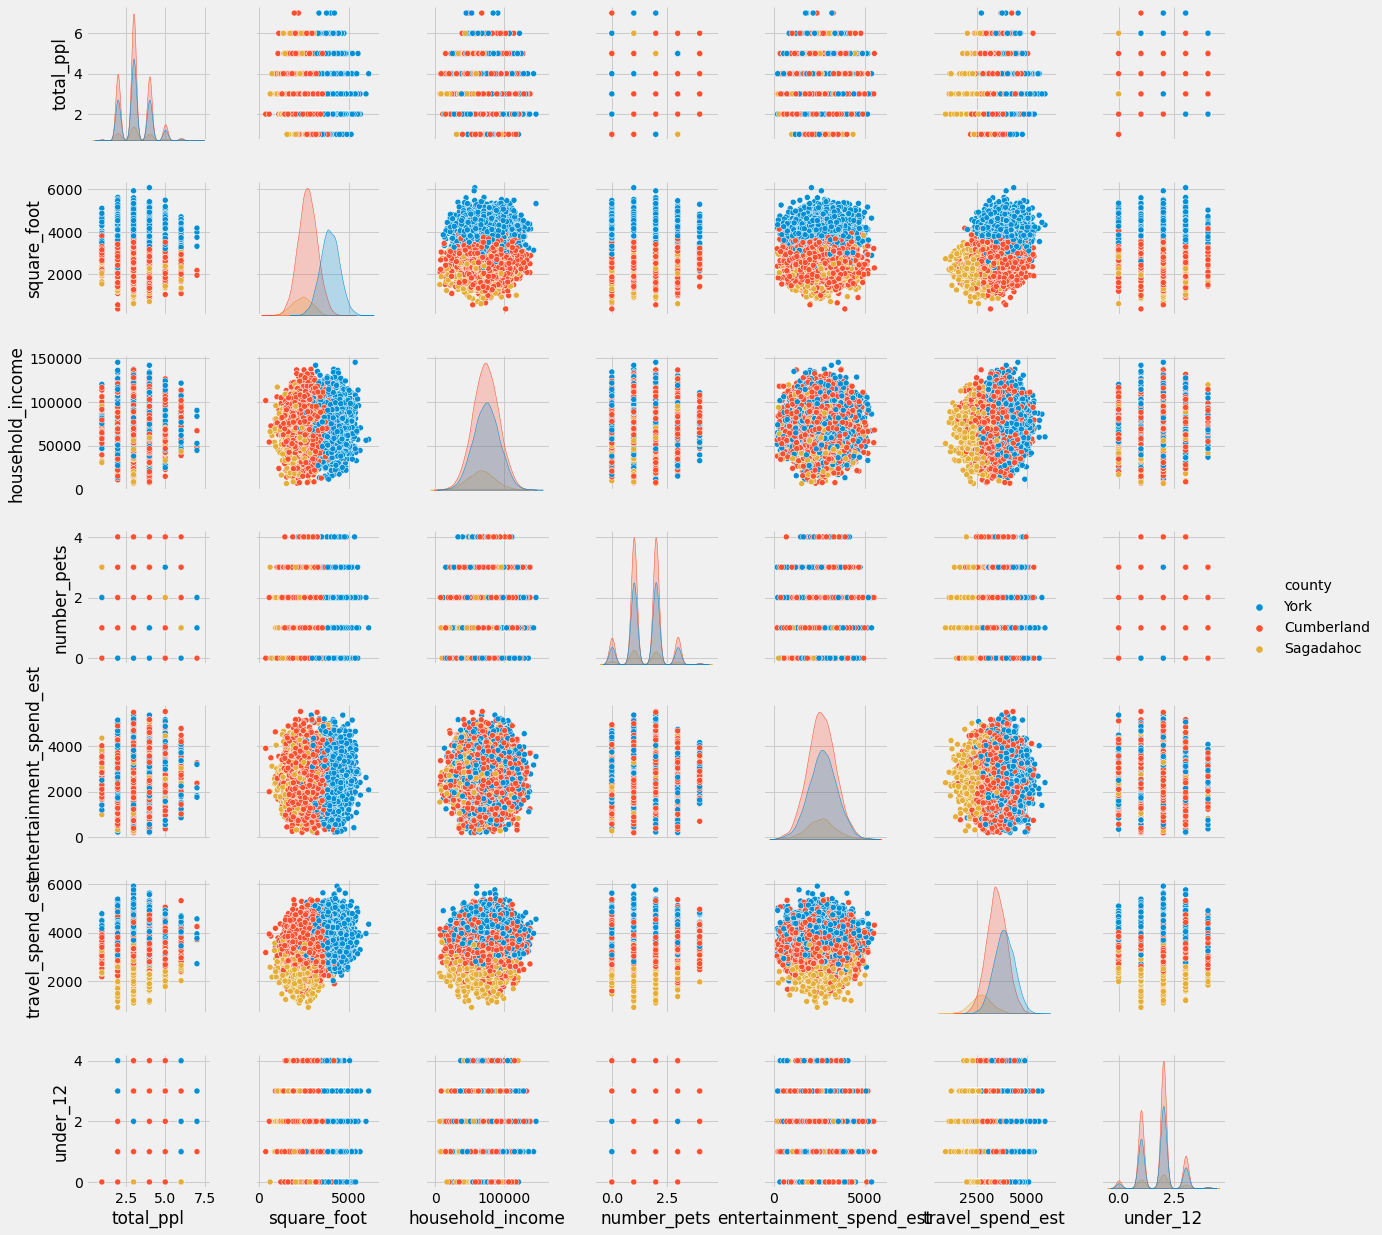

In [17]:
sns.pairplot(data=df, hue="county"); #takes time to run

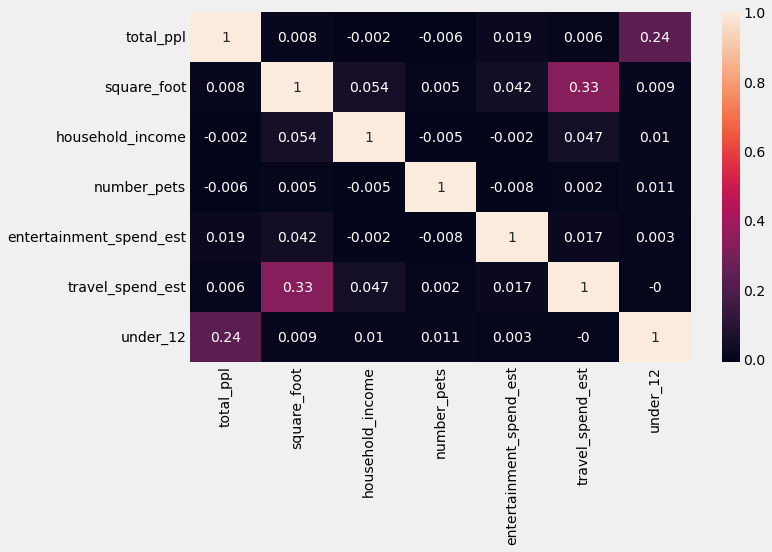

In [18]:
corr = df.corr().round(3)

plt.figure(figsize= (10,6))
sns.heatmap(corr, annot= True);

In [19]:
#Data Prep for Modeling
#Selecting only the numerical columns
df_numerical = df.select_dtypes(['int', 'float'])
df_numerical.head(2)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,under_12
0,3,3309,80464,1,2535,2842,1
1,3,3814,47696,2,2913,3938,1


In [20]:
#Standardizing
from sklearn.preprocessing import StandardScaler

# intiate 
scaler = StandardScaler()

# fit and transform 
df_numerical_scaled = scaler.fit_transform(df_numerical)

In [21]:
type(df_numerical_scaled)

numpy.ndarray

In [25]:
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns = df_numerical.columns)

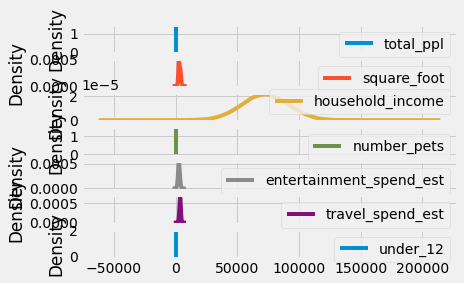

In [26]:
df_numerical.plot(kind = 'kde', subplots = True);

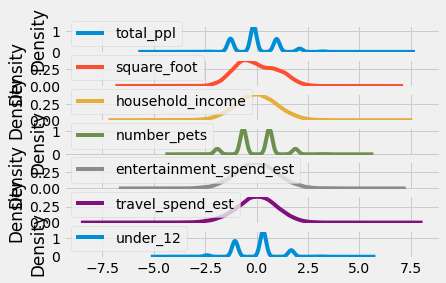

In [27]:
df_numerical_scaled.plot(kind = 'kde', subplots = True);

In [28]:
#Replacing the original values with scaled values
num_cols = df_numerical.columns.tolist()

In [29]:
df_orig = df.copy()

In [30]:
df.loc[:, num_cols] = df_numerical_scaled[num_cols]

In [31]:
df.head()

,total_ppl,own_rent,square_foot,household_income,number_pets,county,entertainment_spend_est,travel_spend_est,under_12,LL_passholder
0,-0.145886,own,0.232960,0.421607,-0.644446,York,-0.152014,-1.190688,-1.047109,No
1,-0.145886,own,0.851909,-1.325289,0.621159,York,0.341153,0.636601,-1.047109,No
2,-0.145886,rent,-0.645826,1.903227,0.621159,Cumberland,-0.868282,0.218125,0.318923,No
3,-1.267513,own,-0.601703,-0.239450,-0.644446,Cumberland,-0.191155,-1.217364,-1.047109,No
4,-0.145886,rent,-0.829672,-0.520825,0.621159,Sagadahoc,1.160490,-3.688205,0.318923,No


# Convert categorical value to numerical

In [32]:
df = pd.get_dummies(df, drop_first = True)

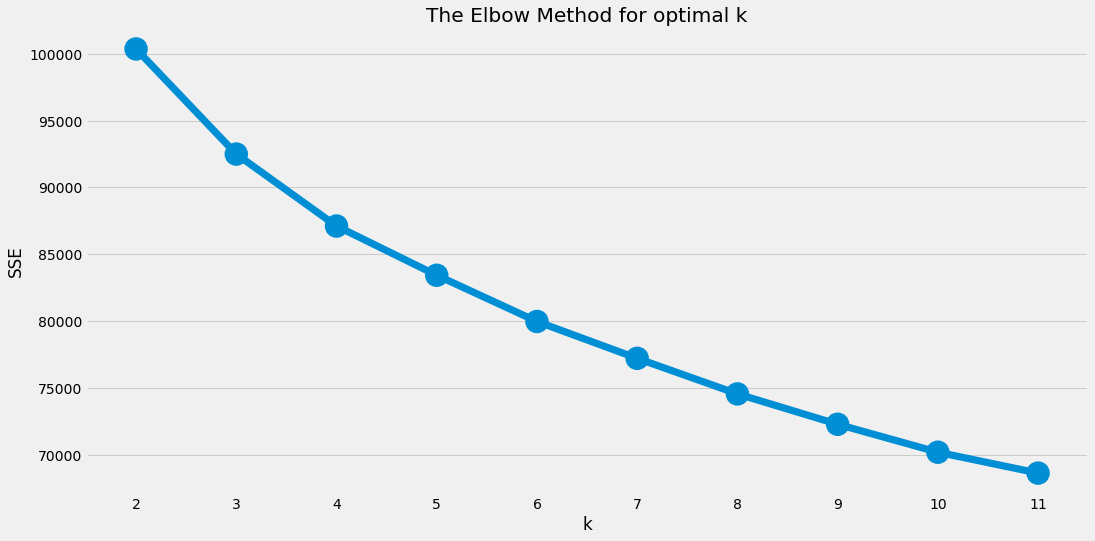

In [33]:
# MODEL BUILDING
from sklearn.cluster import KMeans
sse = {}

for k in range(2, 12):
    kmeans = KMeans(n_clusters= k, random_state = 0)
    kmeans.fit(df)
    sse[k] = kmeans.inertia_
    
#Viz    
plt.figure(figsize=(16,8))
plt.title('The Elbow Method for optimal k')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));

In [34]:
#**Understand the change in Elbow Methods**
interia_df = pd.DataFrame(sse, index = range(0, len(sse)))
interia_df = interia_df.drop_duplicates().T
interia_df['pct_change'] = interia_df.pct_change().round(4).multiply(-100)
interia_df = interia_df.reset_index()
interia_df

,index,0,pct_change
0,2,100361.820228,NaN
1,3,92497.406894,7.84
2,4,87113.872506,5.82
3,5,83430.557557,4.23
4,6,79973.591814,4.14
5,7,77214.974768,3.45
6,8,74556.388356,3.44
7,9,72283.143401,3.05
8,10,70193.309446,2.89
9,11,68631.007490,2.23


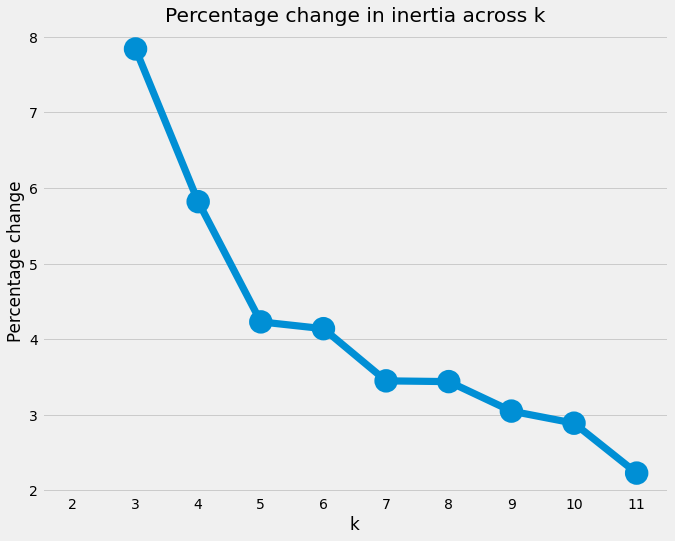

In [35]:
plt.figure(figsize=(10,8))

# plot the chart
sns.pointplot(interia_df['index'], y = interia_df['pct_change'])

# format chart
plt.title('Percentage change in inertia across k')
plt.xlabel('k')
plt.ylabel('Percentage change');

In [36]:
# intiate the model 
kmean = KMeans(random_state=0, n_clusters = 5)

# fit the model 
kmean.fit(df)

KMeans(n_clusters=5, random_state=0)

In [37]:
kmean.labels_
len(kmean.labels_)

15000

In [38]:
df_orig['cluster'] = kmean.labels_

In [39]:
df_orig.head(2)

,total_ppl,own_rent,square_foot,household_income,number_pets,county,entertainment_spend_est,travel_spend_est,under_12,LL_passholder,cluster
0,3,own,3309,80464,1,York,2535,2842,1,No,3
1,3,own,3814,47696,2,York,2913,3938,1,No,1


In [40]:
## Cluster Level Analysis
grouped = df_orig.groupby(['cluster'])

grouped.agg({
'total_ppl' : 'mean', 
'square_foot': 'mean',
'household_income' : 'mean',
'number_pets' : 'mean',
'entertainment_spend_est' : 'mean',
'travel_spend_est' : ['mean','count'],
'under_12' : 'mean'}).round(2)

total_ppl square_foot household_income number_pets  \
             mean        mean             mean        mean   
cluster                                                      
0            2.81     2623.04         70051.28        2.27   
1            3.32     3988.93         68918.10        1.51   
2            4.26     2746.49         73767.24        1.49   
3            2.79     2601.36         69663.25        0.77   
4            2.66     3735.89         82910.00        1.48   

        entertainment_spend_est travel_spend_est       under_12  
                           mean             mean count     mean  
cluster                                                          
0                       2654.46          3314.59  3417     1.60  
1                       3054.80          3934.48  3172     2.06  
2                       2567.18          3395.31  2503     2.38  
3                       2653.80          3288.70  3330     1.58  
4                       2230.34          3912.56  2578     1.27

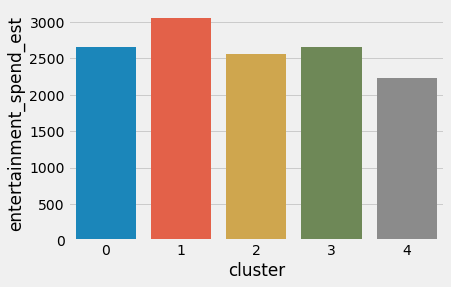

In [41]:
sns.barplot(data = df_orig, x = 'cluster', y = 'entertainment_spend_est', ci = None);

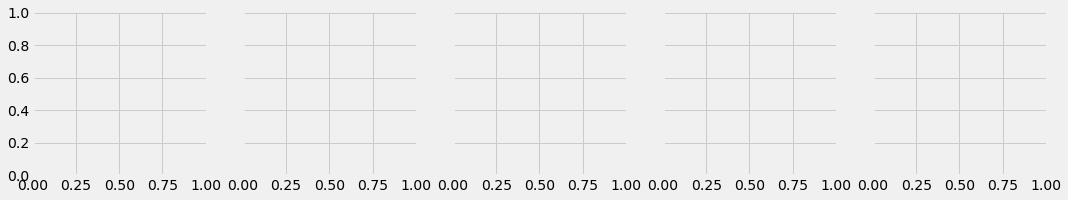

In [42]:
# scatter plot
g = sns.FacetGrid(df_orig, col="cluster")
g

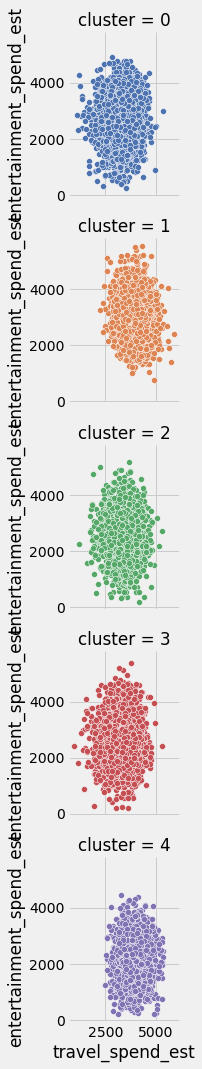

In [43]:
g = sns.FacetGrid(df_orig, row="cluster",  hue = 'cluster',palette = "deep")

g.map(sns.scatterplot, 'travel_spend_est', 'entertainment_spend_est')

In [ ]:
#The  first and last cluster group
are dissimilar but you can see some similarity in observations in cluster 2 and cluster 3 in terms of travel spend and entertaintment spent so the marleting team can put similar compaigns and of
fers to specific set of customers in this 2 customers groups